In [26]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from util import*

In [27]:
# Specify the path to download data
download_path = os.getcwd() + "/dataset/"
print(download_path)

/Users/zhenglyu/Desktop/Research/course/cme216/course_project/cme-216-housing-pricing-prediction/dataset/


In [28]:
ds = download_skl_dataset(download_path)

In [29]:
data, target, feature_names, DESCR = data_process(ds)

In [30]:
data_norm, std_data, mean_data = feature_normalization(data, log_flag=False)

In [31]:
# Split data to training, validation and testset
x_train, y_train, x_val, y_val, x_test, y_test = train_set_prepare(data_norm, target, random_state=100)

In [32]:
rfReg = RandomForestRegressor(n_estimators=30)
rfReg = rfReg.fit(x_train, y_train)

In [33]:
y_val_pred = rfReg.predict(x_val)

1019.0177319998111


In [34]:
y_pred = rfReg.predict(x_test)

In [38]:
mse = np.mean(((y_pred - y_test)**2))
print(mse)

0.24685507073638835


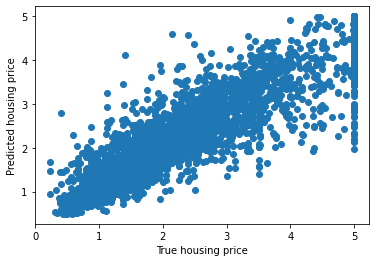

In [20]:
plot_pred_true(x_test, y_test, y_pred)

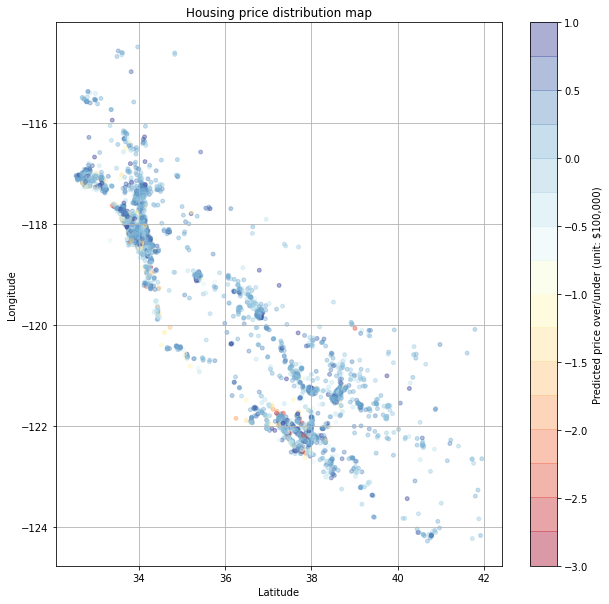

In [21]:
# Plot land map
land_map(x_test*std_data + mean_data, y_pred - y_test, bar_label='Predicted price over/under (unit: $100,000)', clim=[-3, 1], step=16)